# seaborn
- 참조 사이트 : https://seaborn.pydata.org/
- matplotlib을 기반으로 하는 Python 데이터 시각화 라이브러리
- 매력적이고 유익한 통계 그래픽을 그리기 위한 고급 인터페이스 제공
- 업데이터: conda install seaborn(관리자 모드에서 설치)
- 표현 가능 그래프: 관계형, 카테고리, 분포, 회귀분석, 멀티-플롯, 스타일, 색상
- DataFrame으로 구성된 데이터의 경우 아주 쉽게 표현 가능

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
            
%matplotlib inline

In [13]:
from matplotlib import rc, font_manager
# 한글 처리를 위해 폰트 설정
fontname="C:/Windows/Fonts/gulim.ttc"
font_name=font_manager.FontProperties(fname=fontname).get_name()

rc('font',family=font_name)

# 그림 크기
plt.rcParams['figure.figsize']=(12,9)

# titanic field
- survived: 생존여부
- pclass: 좌석등급
- sex: 성별
- age: 나이
- sibsp: 형제자매 + 배우자 숫자
- parch: 부모자식 숫자
- fare: 요금
- embarked: 탑승 항구
- class: 좌석등급 (영문)
- who: 사람 구분
- deck: 데크
- embark_town: 탑승 항구 (영문)
- alive: 생존여부 (영문)
- alone: 혼자인지 여부

In [170]:
# titanic 데이터 로드
titanic=sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
sns.get_dataset_names() # seaborn의 데이터 셋 확인

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

# tips field
- total_bill: 총 합계 요금표
- tip: 팁
- sex: 성별
- smoker: 흡연자 여부
- day: 요일
- time: 식사 시간
- size: 식사 인원

In [171]:
# tips 데이터 로드
tips=sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 1. countplot()
- 항목의 개수를 세어줌
- 알아서 column을 구성하고 있는 value들을 구분하여 보여줌

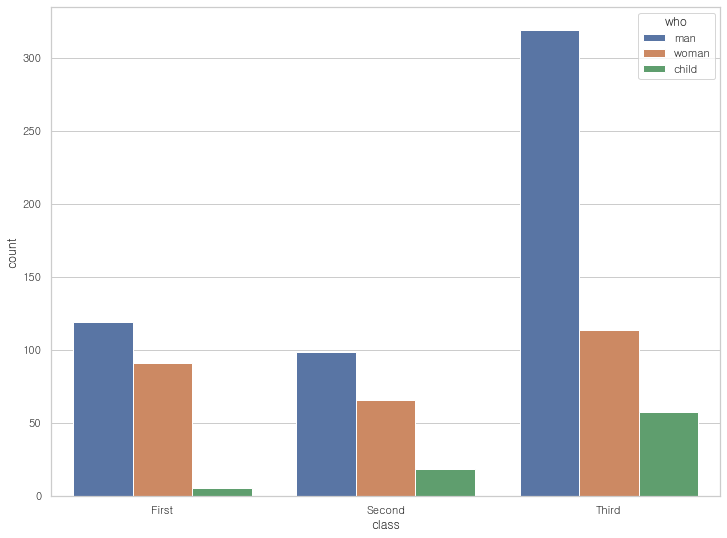

In [15]:
sns.countplot(x='class',hue='who',data=titanic)
plt.show()

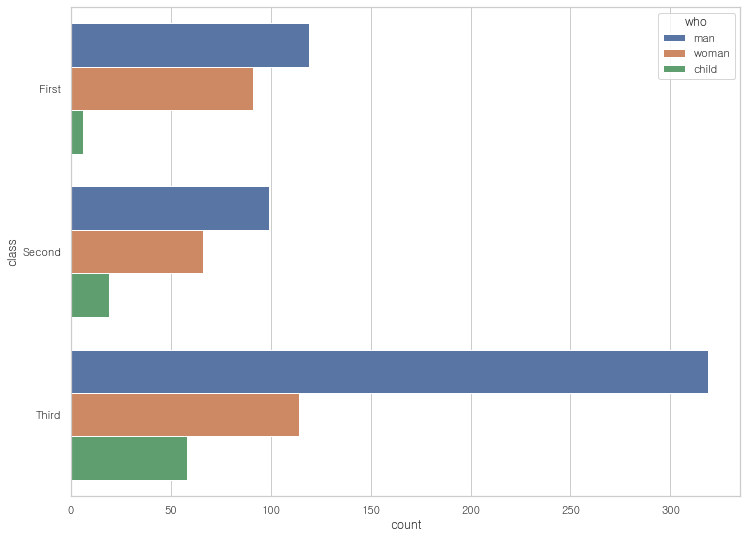

In [16]:
sns.countplot(y='class',hue='who',data=titanic)
plt.show()

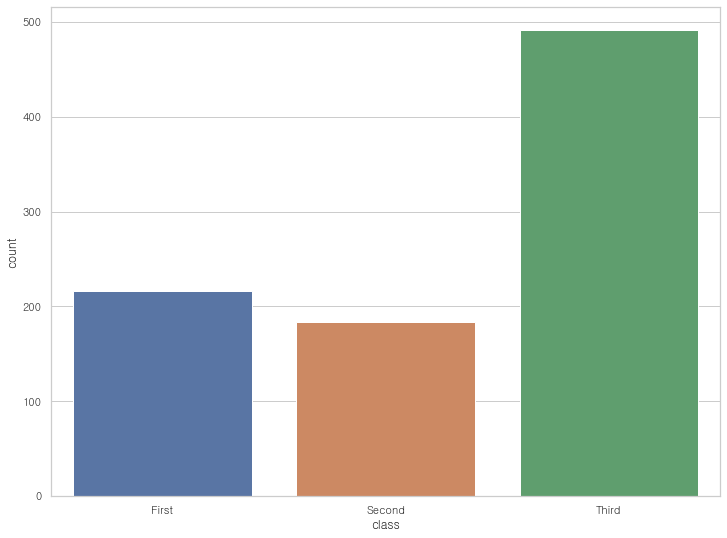

In [18]:
sns.countplot(x='class',data=titanic)
plt.show()

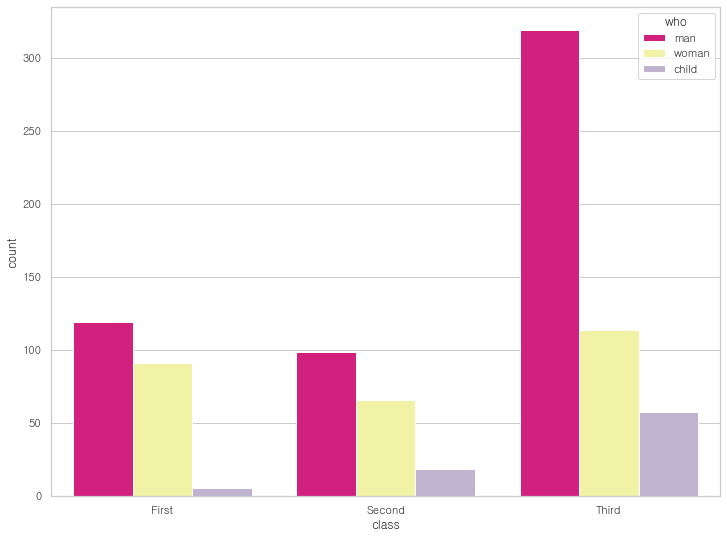

In [24]:
sns.countplot(x='class',hue='who', palette='Accent_r', data=titanic)
# palette 값 입력 오류시 사용가능한 palette명 표시, 예: paletter=Accent111111->error'
plt.show()

In [69]:
# seaborn color palette 사용
# 참조사이트: https://www.geeksforgeeks.org/seaborn-color-palette/
current_palette=sns.color_palette()
#sns.palplot(current_palette)
#sns.palplot(sns.color_palette("Greys"))
#sns.palplot(sns.color_palette("terrain_r",7))
#sns.palplot(sns.color_palette("deep",10))
#sns.palplot(sns.color_palette("muted",10))
#sns.palplot(sns.color_palette("bright",10))
#sns.palplot(sns.color_palette("dark",10))
#color=["Blue","White","Red","Yellow","Green","Grey"]
sns.set_palette('bright')
#sns.palplot(sns.color_palette())
#plt.show()

# 2. relplot
- 두 column간의 상관관계를 보여줌

0.6757341092113641


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

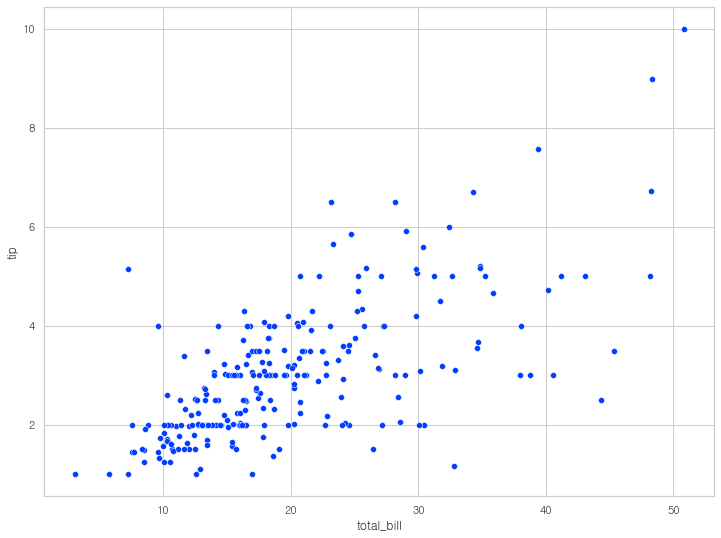

In [71]:
#sns.relplot(x='x축으로 사용할 필드',y='y축으로 사용할 필드', data='dataFrame')
print(tips.total_bill.corr(tips.tip))
#sns.relplot(x='total_bill',y='tip',data=tips)
sns.scatterplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

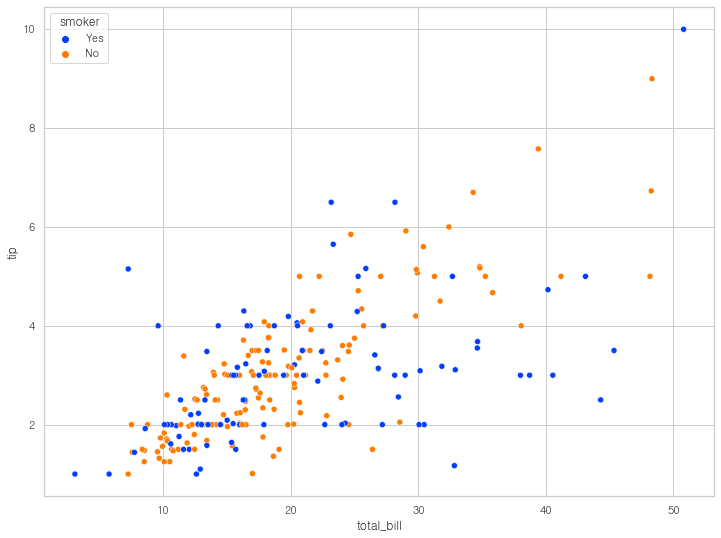

In [72]:
sns.scatterplot(x='total_bill',y='tip',data=tips, hue='smoker')
#sns.relplot(x='total_bill',y='tip',data=tips, hue='smoker')

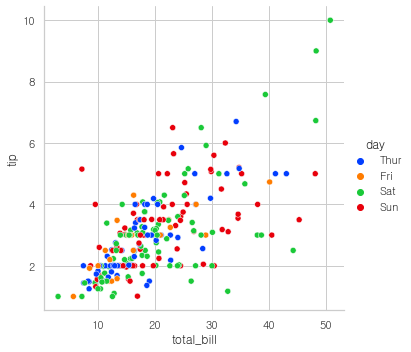

In [75]:
sns.relplot(x='total_bill',y='tip',data=tips, hue='day')
plt.show()

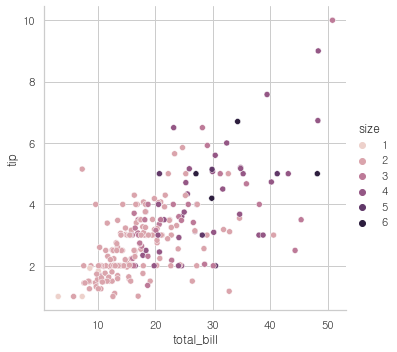

In [76]:
# hue 색상 : 수치형 데이터
sns.relplot(x='total_bill',y='tip',data=tips, hue='size')

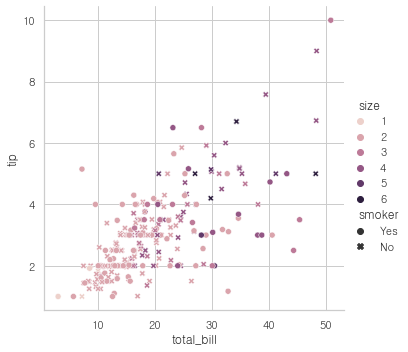

In [79]:
# style & hue
sns.relplot(x='total_bill',y='tip',data=tips, style='smoker', hue='size')

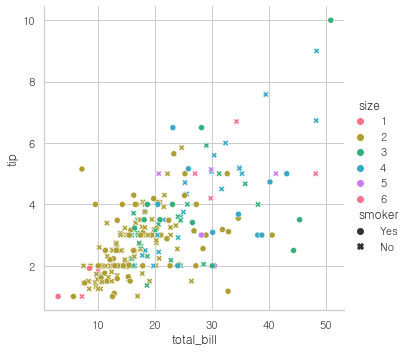

In [80]:
sns.relplot(x='total_bill',y='tip',data=tips, style='smoker', hue='size', palette='husl')

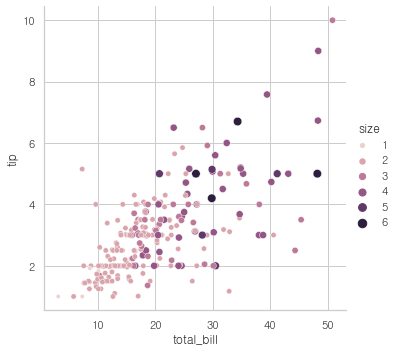

In [84]:
# 마크의 크기 설정
sns.relplot(x='total_bill',y='tip',data=tips, size='size', hue='size')

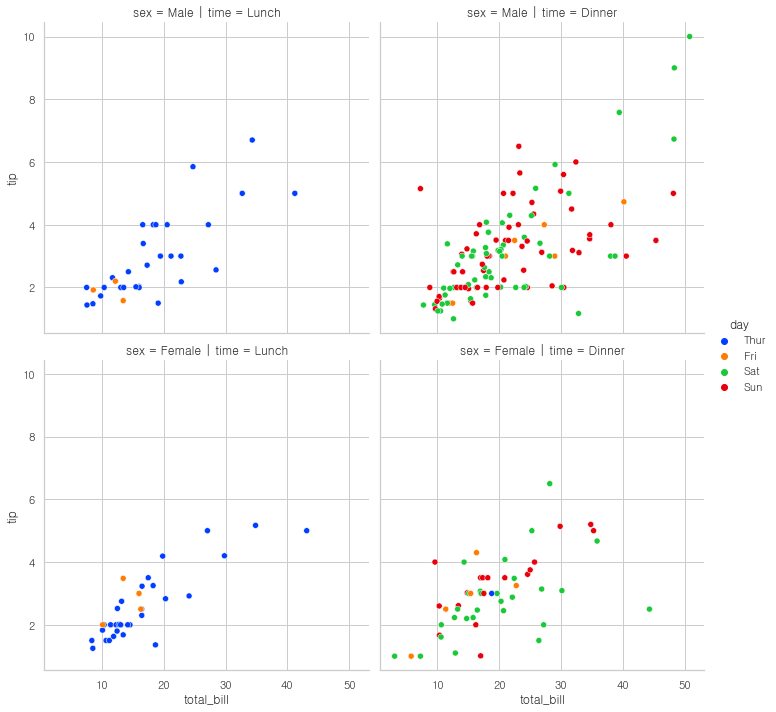

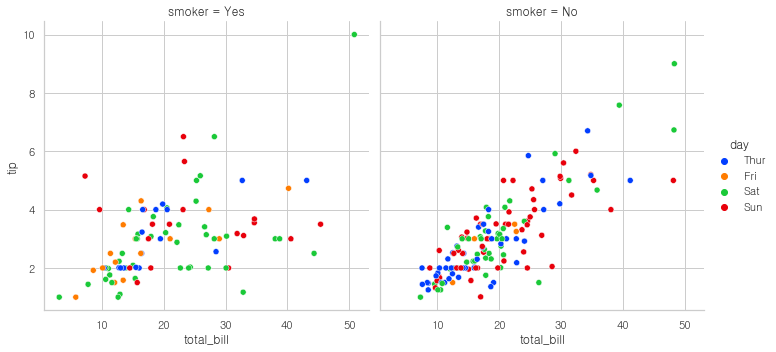

In [92]:
# row와 column에 표기할 데이터 column 선택하여 표현 가능
sns.relplot(x='total_bill',y='tip',data=tips, row='sex', col='time', hue='day')
sns.relplot(x='total_bill',y='tip',data=tips, col='smoker', hue='day')
plt.show()

In [103]:
# relplot로 line 그래프 그리기
df=pd.DataFrame(dict(time=np.arange(0,500,1), value=np.random.randn(500).cumsum()))
# randn 으로 마이너스 값 가져올 수 있음
df

,time,value
0,0,0.195486
1,1,-0.440595
2,2,-2.324089
3,3,-1.911925
4,4,-1.288426
...,...,...
495,495,-23.238319
496,496,-23.249101
497,497,-22.727242
498,498,-21.386526


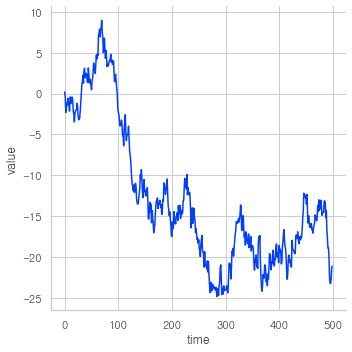

In [104]:
plt.rcParams['axes.unicode_minus']=False
sns.relplot(x='time',y='value',data=df,kind='line')

In [105]:
fmri=sns.load_dataset('fmri')
print(fmri.shape)
fmri


(1064, 5)


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


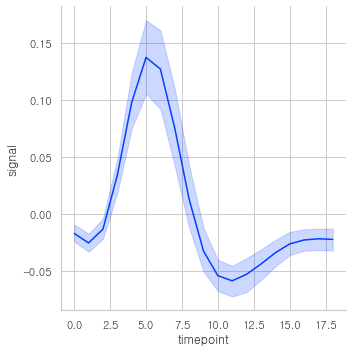

In [109]:
# 95% 신뢰구간 보여줌
sns.relplot(x='timepoint',y='signal',data=fmri,kind='line')
# 하나의 x좌표에 여러개의 값이 있을 때 아래처럼 표현
# 진한 선: 해당 x좌표의 평균값
# 연한 선: 해당 x좌표의 신뢰구간 95% 영역

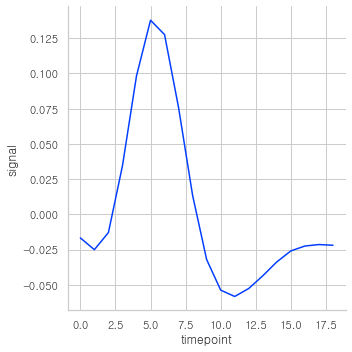

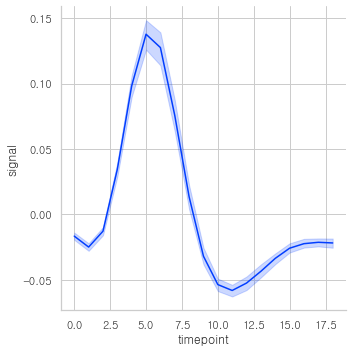

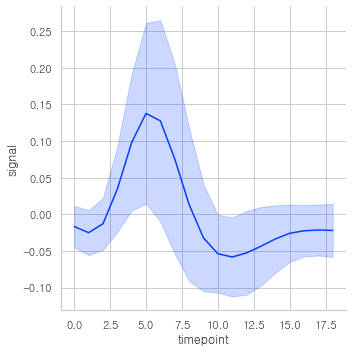

In [118]:
# ci=None: 신뢰구간 없이 표현
# ci=int: 신뢰구간 퍼센티지
# ci='sd': 표준편차 내의 값을 모두 보여줌
sns.relplot(x='timepoint',y='signal',data=fmri,kind='line',ci=None)
sns.relplot(x='timepoint',y='signal',data=fmri,kind='line',ci=50)
sns.relplot(x='timepoint',y='signal',data=fmri,kind='line',ci='sd')

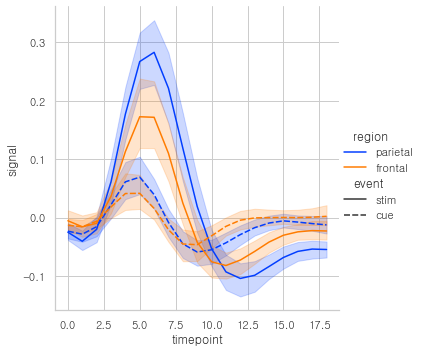

In [120]:
# signal을 세부 영역으로 나누어 표현
sns.relplot(x='timepoint',y='signal',data=fmri,kind='line',hue='region',style='event')

# 3. distplot
- matplotlib의 hist 그래프와 kdeplot을 통합한 그래프이며, 분포와 밀도를 확인할 수 있다.
- kde: kernel Endsity Estimation

In [121]:
# histplot을 구현하기 위한 샘플 데이터를 생성
x=np.random.randn(100)
x

array([-1.29351127e+00,  3.00317360e-03,  3.22063774e-01,  5.85242021e-01,
       -4.06339857e-01,  5.77747977e-01,  9.33549323e-01,  1.34568447e+00,
       -8.79830154e-01, -3.99136945e-02,  7.94251760e-01, -6.53506446e-02,
        3.02242054e+00, -2.22113145e-02,  9.53943530e-01, -5.20276783e-01,
        2.06334794e+00, -2.34253286e-01, -8.56511863e-02,  1.79270402e+00,
       -1.83316312e-01,  1.27763416e+00,  1.15679346e+00,  4.97787378e-01,
        4.35257626e-02,  3.85536835e-01,  7.25166020e-01,  1.69526598e+00,
        4.83877126e-01, -9.33339556e-01, -1.04634868e+00,  5.42735442e-01,
        5.73442645e-01,  6.56535932e-01, -6.33895300e-01, -1.73807371e-01,
        1.16299632e-01, -2.43774128e+00, -1.06633760e+00, -9.50754403e-01,
       -2.05419922e+00, -3.08914124e-01, -1.11811069e+00,  2.53450425e+00,
       -7.31913539e-01,  1.66510349e-01, -3.75489555e-01,  2.00188843e+00,
       -2.47701446e-01,  1.45979821e-01,  1.69339650e+00, -1.76238235e-01,
        7.25152592e-01,  

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


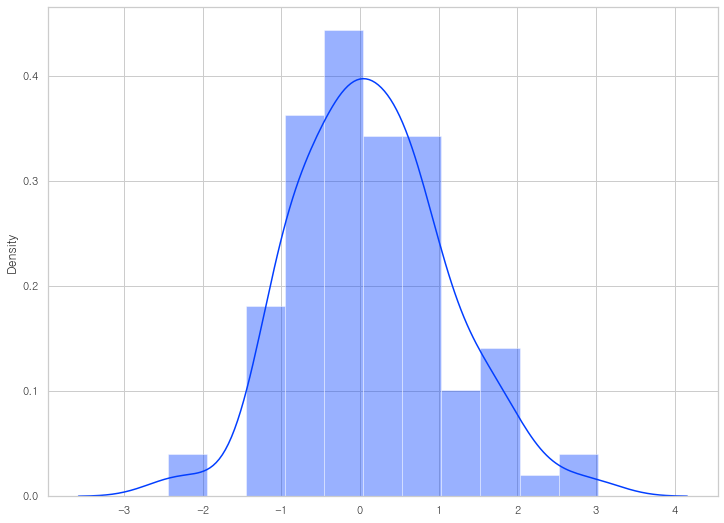

In [122]:
sns.distplot(x)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


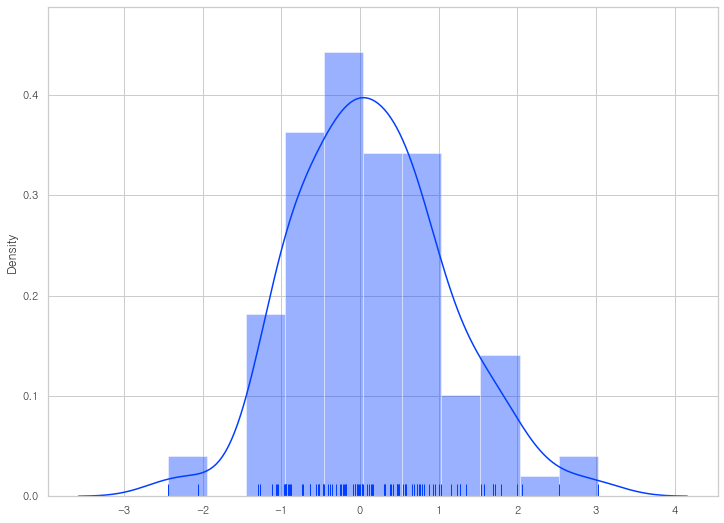

In [128]:
sns.distplot(x, rug=True, hist=True, kde=True) # rug로 밀도를 표시해줌
plt.show()

<AxesSubplot:ylabel='Density'>

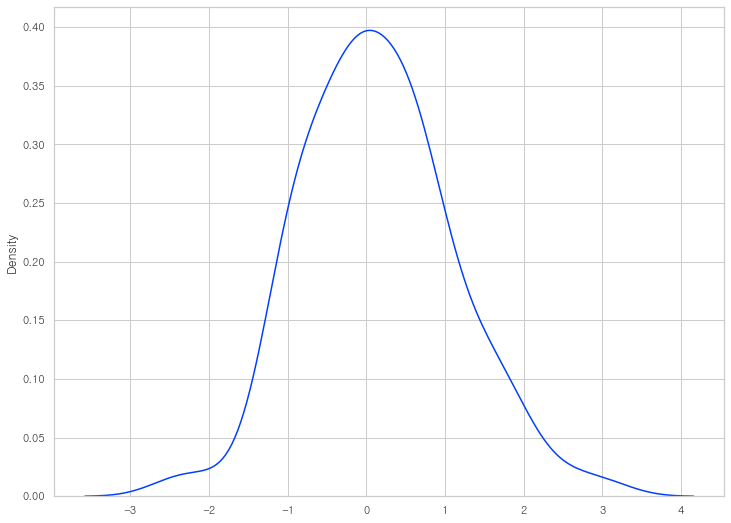

In [130]:
sns.kdeplot(x)

<AxesSubplot:ylabel='Count'>

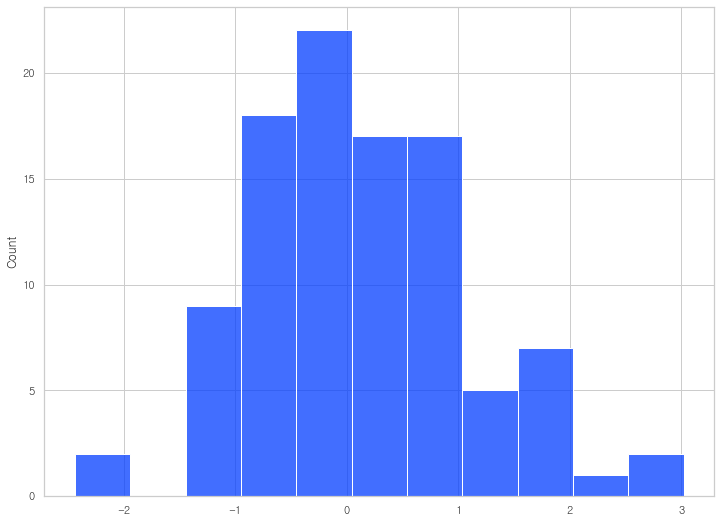

In [131]:
sns.histplot(x)

(array([ 2.,  0., 16., 15., 23., 24., 10.,  6.,  2.,  2.]),
 array([-2.43774128, -1.8917251 , -1.34570891, -0.79969273, -0.25367655,
         0.29233963,  0.83835581,  1.38437199,  1.93038818,  2.47640436,
         3.02242054]),
 <BarContainer object of 10 artists>)

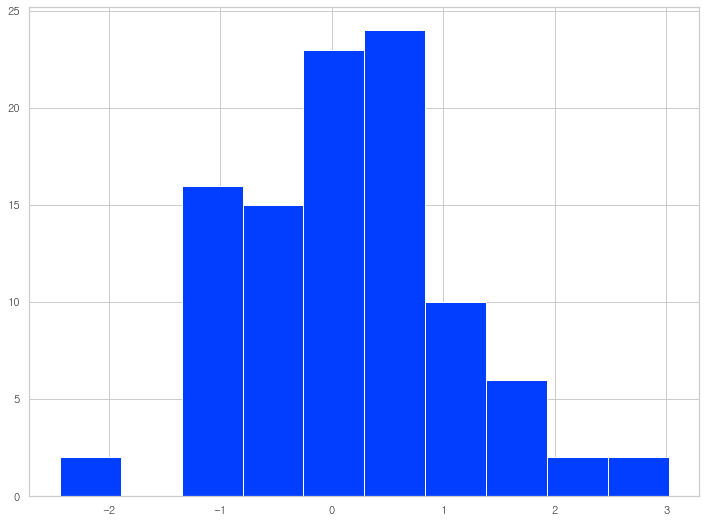

In [134]:
plt.hist(x)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


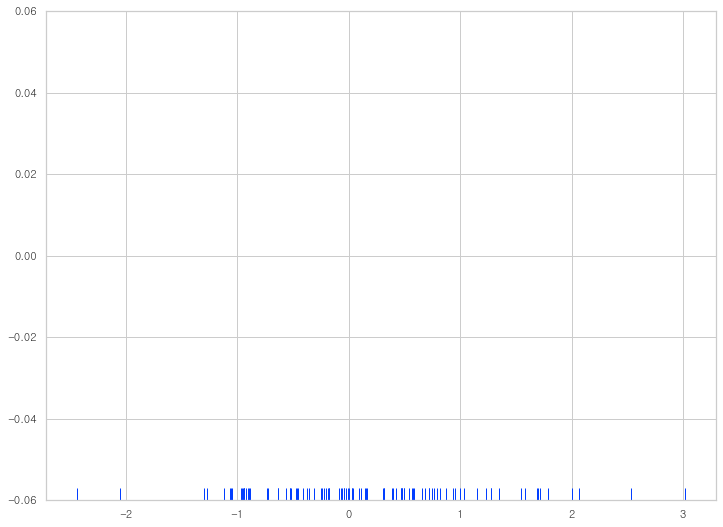

In [139]:
# rugplot
# rug는 rugplot이라고도 불리우며, 데이터 위치를 x축 위에 **작은 선분(rug)으로 나타내어
# 데이터들의 위치 및 분포**를 보여준다.
sns.distplot(x, rug=True, hist=False, kde=False)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


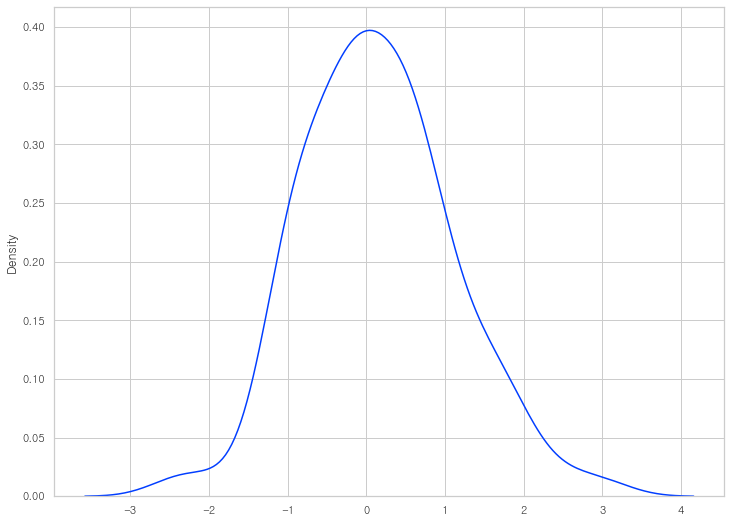

In [138]:
# kde(kernel density)plot
# kde는 histogram보다 부드러운 형태의 분포 곡선을 보여주는 방법

sns.distplot(x, rug=False, hist=False, kde=True)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density'>

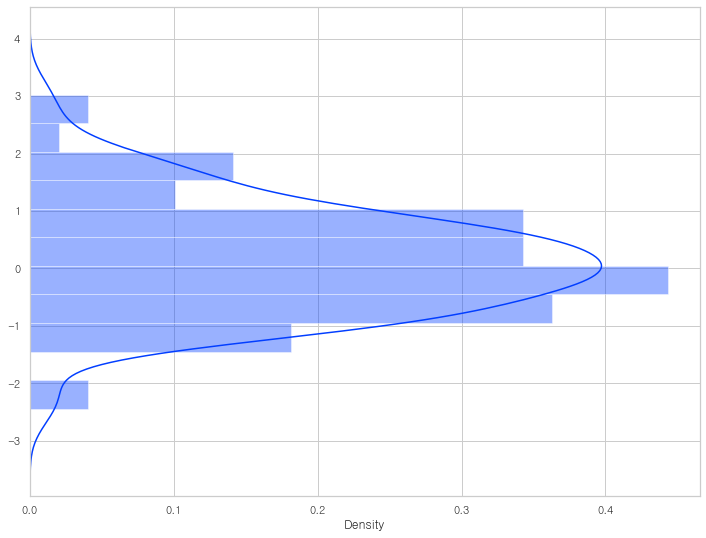

In [140]:
# 가로로 표현하기
sns.distplot(x, vertical=True)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


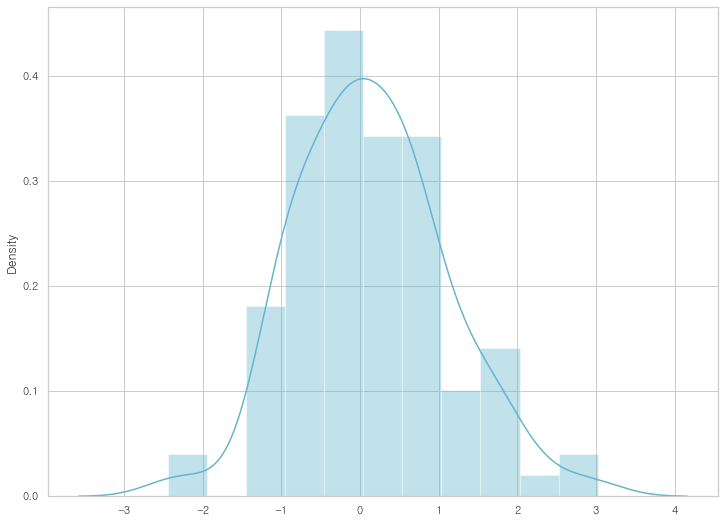

In [147]:
# 컬러 변경하기 color: r,g,b,c,m,y 가능
sns.distplot(x,color='c')
plt.show()

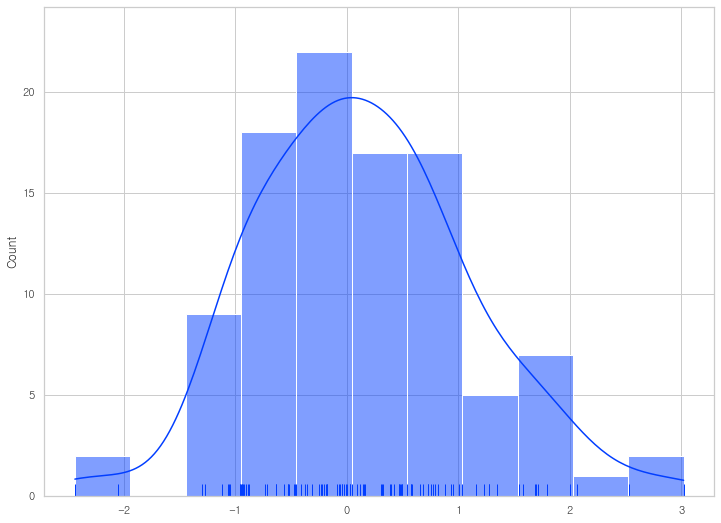

In [157]:
# histplot() 사용하기
sns.histplot(data=x, kde=True) 
# rug는 바로 설정할 수 없음. 따로 설정해준 뒤 plt.show()로 합쳐주기
sns.rugplot(x=x)
plt.show()

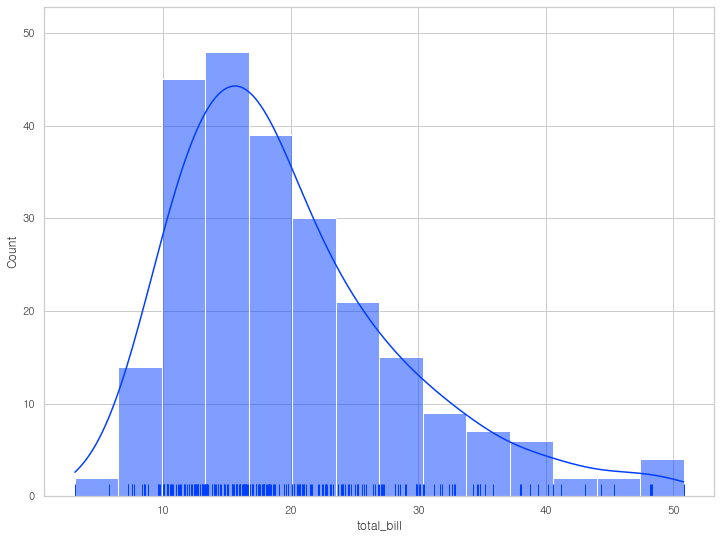

In [156]:
#sns.histplot(data=tips, kde=True)
sns.histplot(data=tips.total_bill, kde=True)
sns.rugplot(x=tips.total_bill)
plt.show()

# 4. heatmap
- 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 열분포 형태의 비쥬얼한 그래픽으로 출력 가능
- 상관 관계에서 가장 많이 사용됨

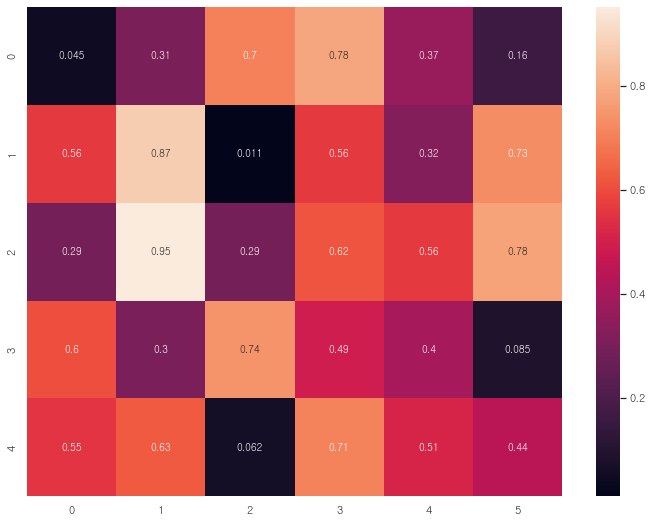

In [164]:
# 기본 heatmap
heatmap_data = np.random.rand(5,6)
sns.heatmap(heatmap_data, annot=True) # annot=True로 해야 수치 표현도 가능
plt.show()

In [165]:
# pivot table을 활용해서 heatmap을 그릴 수 있음
pivot=tips.pivot_table(index='day', columns='size', values='tip')
pivot

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


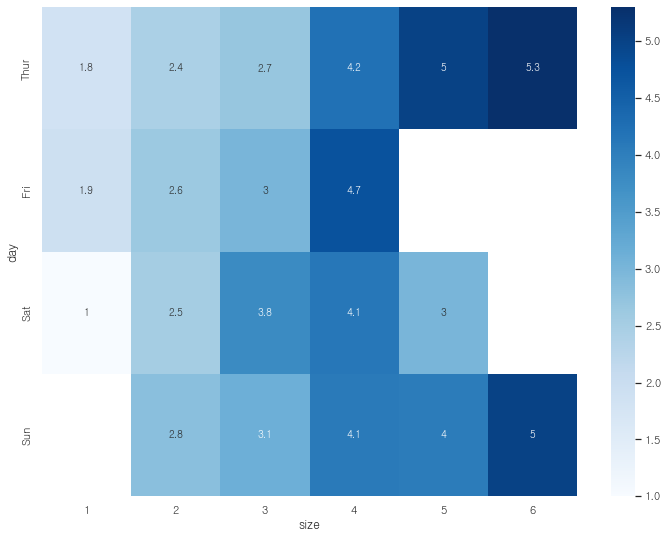

In [166]:
sns.heatmap(pivot,cmap='Blues',annot=True) # cmap으로 전체적인 컬러 조정 가능
plt.show()

In [173]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [174]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


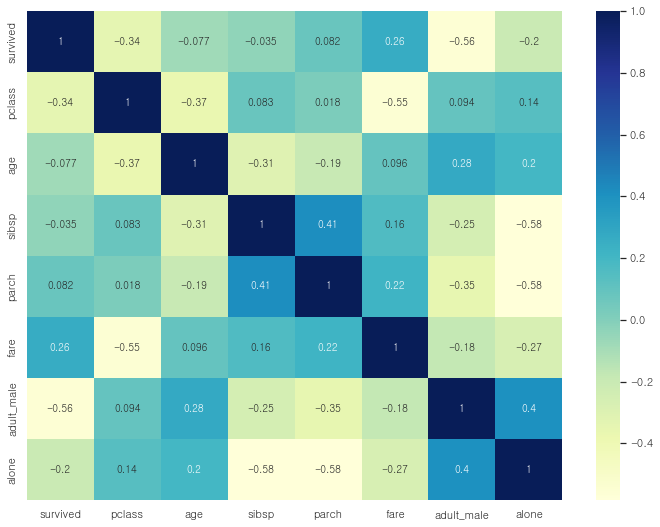

In [176]:
# 상관 관계(절댓값)가 높을 수록 연관이 있음
sns.heatmap(titanic.corr(), annot=True, cmap='YlGnBu')
plt.show()

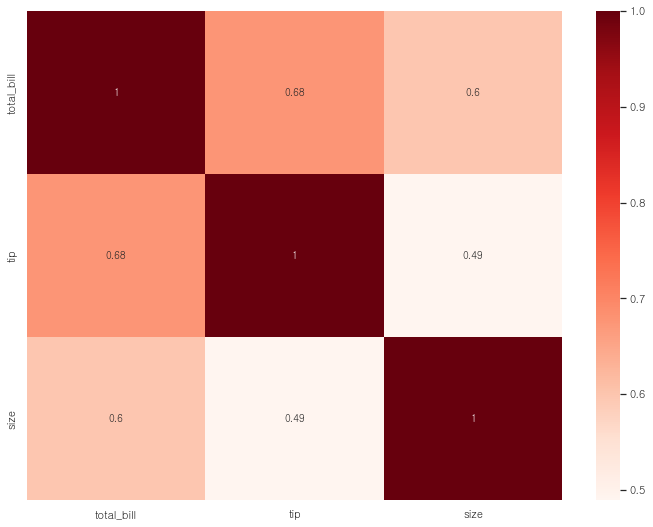

In [178]:
sns.heatmap(tips.corr(), annot=True, cmap='Reds')
plt.show()